# Import all modules

In [1]:
import numpy as np
import scipy
from scipy.stats import norm, truncnorm,mannwhitneyu
import matplotlib.pyplot as plt
import math

# Task 1

In [2]:
def tau1(x):
    return 6000/(math.sqrt(2)*x[0]*x[1])
    
def tau2(x):
    return (6000*(14 + 0.5*x[1])*math.sqrt(0.25*(x[1] ** 2 + (x[0] + x[2]) ** 2))) / (2*(0.707*x[0]*x[1] * ((x[1] ** 2)/12 + 0.25*((x[0] + x[2]) ** 2))))

def shear_stress(x):
    return math.sqrt((tau1(x) ** 2 + tau2(x) ** 2) + (x[1] * tau1(x) * tau2(x)) / (math.sqrt(0.25*(x[1] ** 2 + (x[0] + x[2]) ** 2))))

def normal_stress(x):
    return 504000/(x[2]**2 * x[3])

def buckling_load(x):
    return 64746.022 * (1 - 0.0282346 * x[2]) * x[2] * x[3] ** 3

In [3]:
def f(x):
    f.counter += 1
    return 1.10471*x[0]**2*x[1] + 0.04811*x[2]*x[3]*(14 + x[1])
f.counter = 0

def g1(x):
    g1.counter += 1
    return 13600 - shear_stress(x)
g1.counter = 0

def g2(x):
    g2.counter += 1
    return 30000 - normal_stress(x)
g2.counter = 0

def g3(x):
    g3.counter += 1
    return x[3] - x[0]
g3.counter = 0

def g4(x):
    g4.counter += 1
    return buckling_load(x) - 6000
g4.counter = 0

### Testing functions

In [4]:
x = np.array([1.05,3.15,4.43,7.87])
print("Objective function output: ", f(x))
print("First constraint function output: ", g1(x))
print("Second constraint function output: ", g2(x))
print("Third constraint function output: ", g3(x))
print("Fourth constraint function output: ", g4(x))

Objective function output:  32.6024179859
First constraint function output:  5308.848564674312
Second constraint function output:  26736.764990548952
Third constraint function output:  6.82
Fourth constraint function output:  122317448.61430933


# Task 2


In [5]:
def random_search(func, max_iter, lower_bound, upper_bound, fargs):
    points_to_evaluate = np.random.uniform(lower_bound, upper_bound,size = (max_iter, len(lower_bound)))
    
    rejected = 0          
    results = []
    
    for point in points_to_evaluate:
        for i in range(len(fargs)):
            if fargs[i](point) >= 0:
                rejected = rejected + 1
            else:
                rejected = rejected
        
        if rejected == 4:
            results.append(func(point))
        rejected = 0
    results = np.array(results)
    best_ind = np.argmin(results)   
    return points_to_evaluate[best_ind] , results[best_ind]

    

In [6]:
np.random.seed(0)
number_of_samples = 1000
lower_bound = np.array([0.125,0.125,0.1,0.1])
upper_bound = np.array([5,5,10,10])
fargs = [g1,g2,g3,g4]

res = random_search(f, number_of_samples,lower_bound, upper_bound, fargs = fargs)
print("The best x values are: {} and the minimum cost of maufacturing is: {:.2f}".format(res[0], res[1]))



The best x values are: [4.45319224 3.54362713 0.77653014 5.05819908] and the minimum cost of maufacturing is: 7.33


# Task 3

In [7]:
def t(k):
    return 100/k;


In [8]:
def s(x,g1,g2,g3,g4,r=50,beta=1):
    return r * np.min([0,g1(x),g2(x),g3(x),g4(x)]) ** beta


def phi_static(x,f,g1,g2,g3,g4,s,r=50,beta=1):
    return f(x) - s(x,g1,g2,g3,g4,r,beta) 

In [9]:
def simulated_annealing(f, sigma, lower_bound, upper_bound, k_max):
    x_best = np.random.uniform(lower_bound,upper_bound,4)
    y_best = phi_static(x_best,f,g1,g2,g3,g4,s)
    x_c = x_best
    y_c = y_best
    random = np.random.uniform(0,1)
    
    
    for k in range(1,k_max+1):
        points = truncnorm.rvs((lower_bound-x_c)/sigma, (upper_bound-x_c)/sigma, loc = x_c, scale = sigma,size = 4)
        result = phi_static(points,f,g1,g2,g3,g4,s)
        delta_y = result - y_c
        if delta_y <= 0 or random < min(math.exp(-delta_y/t(k)),1):
            x_c = points
            y_c = result
        
        if result < y_best:
            x_best = points
            y_best = result
    
    return x_best,y_best

In [10]:
np.random.seed(0)
sigma = []
for i in range(4):
    sigma.append((upper_bound[i] - lower_bound[i]) * 0.1)
sigma = np.array(sigma) 

res = simulated_annealing(f,sigma,lower_bound,upper_bound, number_of_samples)
print("The best x values are: {} and the minimum cost of maufacturing is: {:.2f}".format(res[0], res[1]))

The best x values are: [0.61951873 2.61227478 6.61205396 0.62534261] and the minimum cost of maufacturing is: 4.41


# Task 4

f  1480 g1  2001 g2  2001 g3  2001 g4  2001
f  1467 g1  2001 g2  2001 g3  2001 g4  2001
f  1465 g1  2001 g2  2001 g3  2001 g4  2001
f  1457 g1  2001 g2  2001 g3  2001 g4  2001
f  1489 g1  2001 g2  2001 g3  2001 g4  2001
f  1492 g1  2001 g2  2001 g3  2001 g4  2001
f  1479 g1  2001 g2  2001 g3  2001 g4  2001
f  1490 g1  2001 g2  2001 g3  2001 g4  2001
f  1488 g1  2001 g2  2001 g3  2001 g4  2001
f  1499 g1  2001 g2  2001 g3  2001 g4  2001
f  1480 g1  2001 g2  2001 g3  2001 g4  2001
f  1494 g1  2001 g2  2001 g3  2001 g4  2001
f  1498 g1  2001 g2  2001 g3  2001 g4  2001
f  1485 g1  2001 g2  2001 g3  2001 g4  2001
f  1503 g1  2001 g2  2001 g3  2001 g4  2001
f  1484 g1  2001 g2  2001 g3  2001 g4  2001
f  1496 g1  2001 g2  2001 g3  2001 g4  2001
f  1499 g1  2001 g2  2001 g3  2001 g4  2001
f  1481 g1  2001 g2  2001 g3  2001 g4  2001
f  1534 g1  2001 g2  2001 g3  2001 g4  2001
f  1504 g1  2001 g2  2001 g3  2001 g4  2001


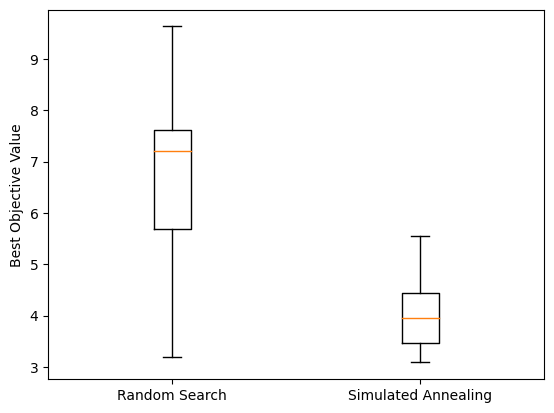

In [11]:
np.random.seed(0)

rs_res = []
sa_res = []
for i in range(21):
    f.counter = 0
    g1.counter = 0
    g2.counter = 0
    g3.counter = 0
    g4.counter = 0
    res1 = random_search(f, number_of_samples,lower_bound, upper_bound, fargs = fargs)
    rs_res.append(res1[1])
    res2 = simulated_annealing(f,sigma,lower_bound,upper_bound, number_of_samples)
    sa_res.append(res2[1])
    print("f ",f.counter, "g1 ",g1.counter,"g2 ",g2.counter,"g3 ",g3.counter,"g4 ",g4.counter)
plt.boxplot([rs_res,sa_res])
plt.xticks([1,2], ['Random Search','Simulated Annealing'])
plt.ylabel("Best Objective Value")
plt.show()